**Week 2**

This document implements a function to build and simulate the Trotter-Suzuki formula.

In [35]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def ev(start, t, n, shots=1000):
    qc = QuantumCircuit(1, 1)

    if start == '0':
        pass
    elif start == '+':
        qc.h(0)
    else:
        raise ValueError("start must be '0' or '+'")

    for _ in range(n):
        qc.rx(2*t/n, 0)
        qc.rz(2*t*0.1/n, 0)

    qc.measure(0, 0)

    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    return (counts.get('0', 0) - counts.get('1', 0))/shots # observed expectation value

In [58]:
def graph(start, divisions=32):
    T = 10
    plt.figure(figsize=(10, 6))
    x = np.arange(0, T, T/divisions)
    y = [ev(start, t, 1000) for t in x]
    plt.ylim(-1.1, 1.1)
    plt.plot(x, y, marker='o')
    plt.xticks(x, [f"{t:.2f}" for t in x])
    plt.xlabel('t')
    plt.ylabel('E[Z]')
    plt.title('EV vs t Starting at |' + start + '⟩ along Z axis')
    plt.grid()
    plt.show()

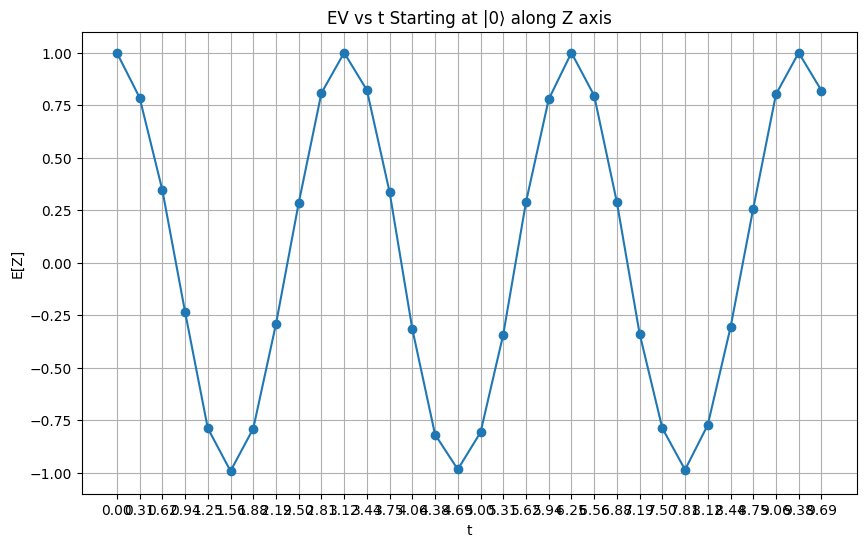

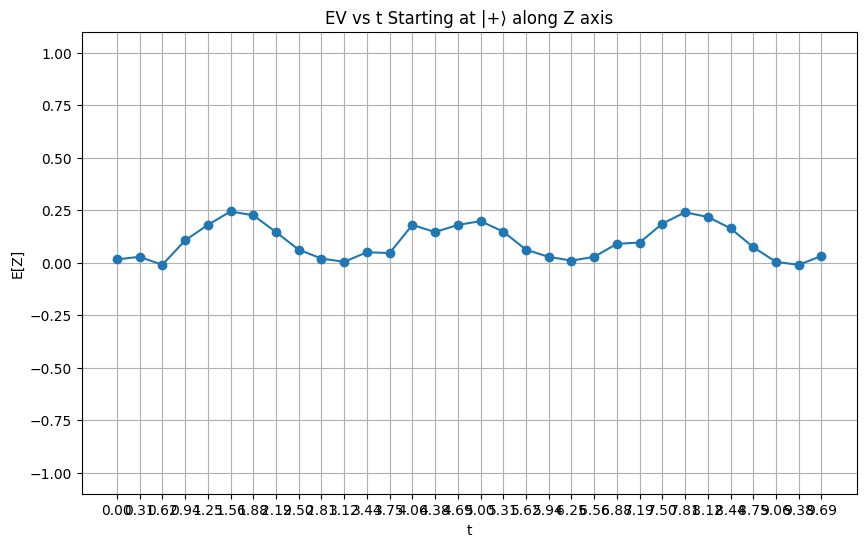

In [59]:
graph('0')
graph('+')

*Observations*

- For high values of N, the $|0\rangle$ EV exhibits $\cos(t)$ properties and the $|+\rangle$ exhibits $\sin(t)$ properties.
- For low values of N, both graphs seem to fit graphs that are linear or multiplicative combinations of trig functions.